In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.modularity_max import greedy_modularity_communities


In [123]:
test = pd.DataFrame({
'source': ['z', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'e', 'e', 'e', 'f', 'f', 'g', 'g', 'g', 'g', 'h', 'h', 'h', 'i', 'i', 'i', 'j', 'j', 'j', 'k', 'k', 'k', 'l', 'l', 'l', 'm', 'm', 'n', 'n', 'n', 'o', 'o', 'p', 'p'],
'target': ['a', 'b', 'j', 'a', 'c', 'b', 'h', 'd', 'e', 'c', 'd', 'g', 'f', 'e', 'g', 'e', 'f', 'h', 'i', 'c', 'g', 'i', 'h', 'g', 'j', 'i', 'a', 'k', 'j', 'l', 'p', 'k', 'm', 'n', 'l', 'n', 'l', 'm', 'o', 'n', 'p', 'k', 'o']
})

In [124]:
def create_graph(lists):
    df = pd.DataFrame(lists, columns=['source', 'target'])
    G = nx.from_pandas_edgelist(df, 'source', 'target')
    return G

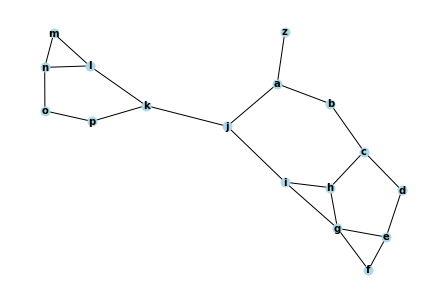

In [125]:
G = create_graph(test)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=80, font_size=10, font_weight='bold')

In [135]:
communities = list(greedy_modularity_communities(G, resolution=0.7))
communities

[frozenset({'j', 'k', 'l', 'm', 'n', 'o', 'p'}),
 frozenset({'d', 'e', 'f', 'g', 'h', 'i'}),
 frozenset({'a', 'b', 'c', 'z'})]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


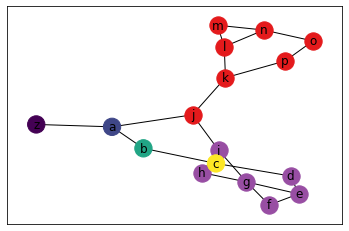

In [136]:
pos = nx.spring_layout(G)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=plt.cm.Set1(i / len(communities)))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

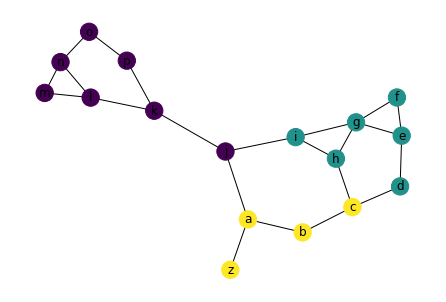

In [137]:
node_to_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_to_community[node] = i
colours = [node_to_community[node] for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=colours)
plt.show()

In [141]:
for i, community in enumerate(communities):
    # Create a subgraph of the community
    subgraph = G.subgraph(community)
    # Compute the small-world coefficient for the subgraph
    if nx.average_clustering(subgraph) == 0 or nx.average_shortest_path_length(subgraph) == 0:
        sigma = 0
    else:
        sigma = nx.smallworld.sigma(subgraph)
    #SW coeff
    print(f"Community {i}: {sigma}")

Community 0: 1.5037593984962405
Community 1: 1.4114285714285713
Community 2: 0
